## Practical Work (TD #2): Support Vector Machines on the Penguins Dataset

1. Apply Support Vector Machines (SVM) to classify penguin species based on body measurements.
2. Explore:
    - preprocessing
    - visualization
    - model training
    - evaluation
    - hyperparameter tuning.

### 🧠 Dataset
* We’ll use Seaborn’s penguins dataset, which contains data about three penguin species:
    - Adelie
    - Chinstrap
    - Gentoo
* Each sample includes physical characteristics like bill length, flipper length, and body mass.

## ⚙️ Step 1 — Load and Explore the Dataset

**Import libraries:**

In [1]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset splitting and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning model
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Load dataset
penguins = sns.load_dataset("penguins")

# Inspect data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.info()
penguins.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


### Step 2 — Encode and Visualize the Data

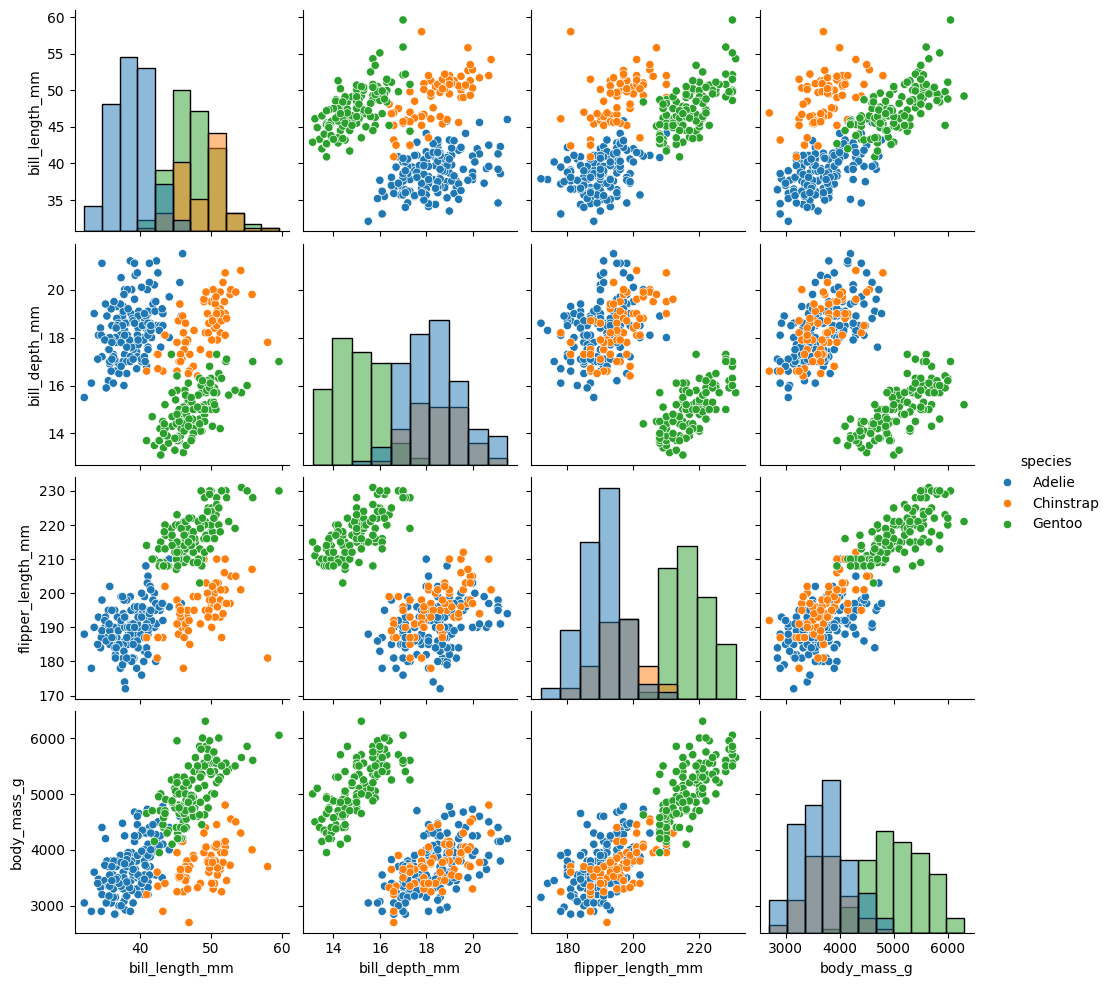

In [8]:
penguins_clean = penguins.dropna().copy()
sns.pairplot(penguins, hue='species', diag_kind='hist')
plt.show()


In [9]:
# Encode target variable
le = LabelEncoder()
penguins_clean["species_encoded"] = le.fit_transform(penguins_clean["species"])

In [10]:
# Select features and target
X = penguins_clean[
    ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
]
y = penguins_clean["species_encoded"]

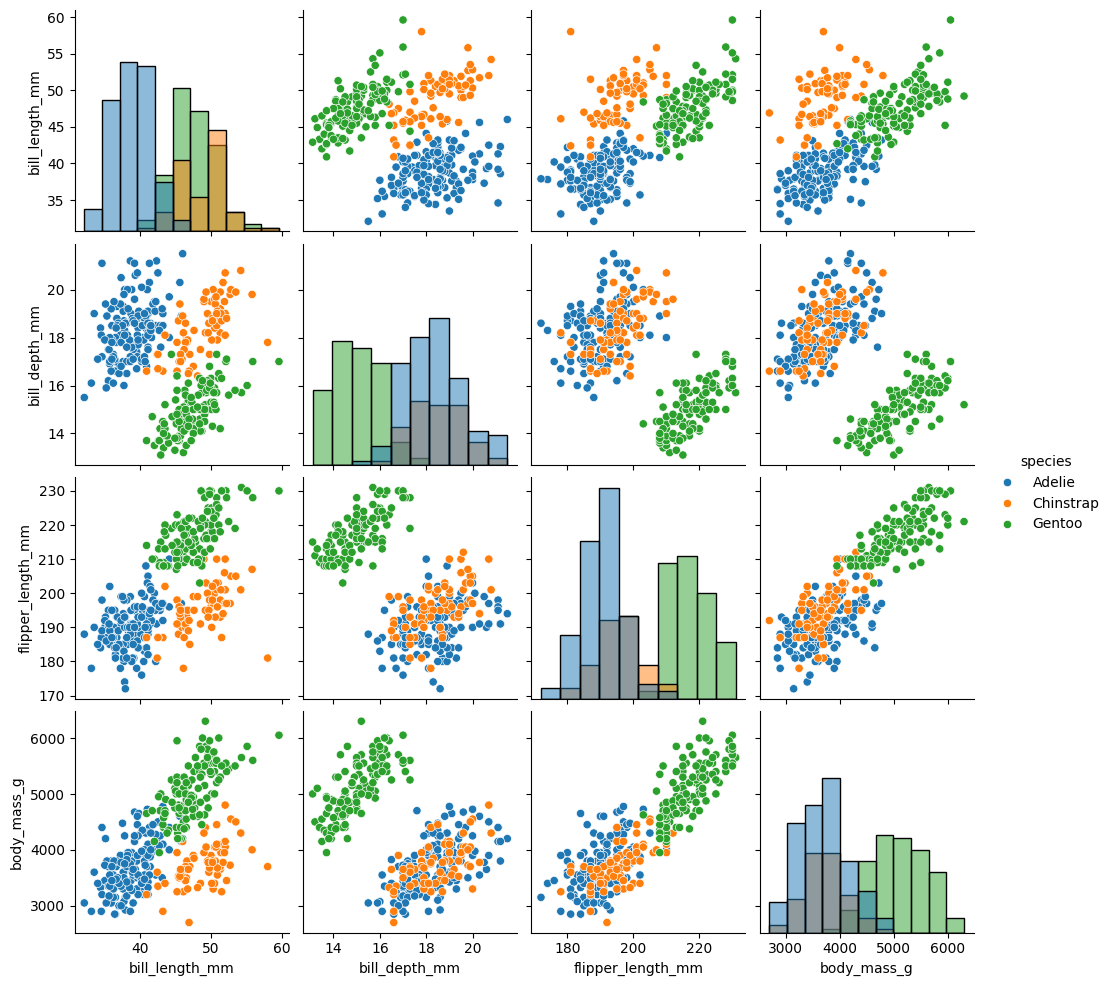

In [11]:
# Visualize the data
sns.pairplot(
    penguins_clean,
    hue="species",
    diag_kind="hist",
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
)
plt.show()


Question:

**Q1**: Do you observe overlap between species?

Yes, there is overlap between Adelie and Chinstrap species, especially in bill length and bill depth. Gentoo penguins appear more clearly separated from the other species.

**Q2**:Which features seem most discriminative?

Flipper length and body mass are the most discriminative features, as they clearly distinguish Gentoo penguins from Adelie and Chinstrap.

### 🧩 Step 3 — Split and Standardize

In [12]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train-test split done. Features standardized for SVM.")

Train-test split done. Features standardized for SVM.


### 🔹 Step 4 — Train a Linear SVM

In [13]:
# Initialize linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42, probability=True)

# Train the model
linear_svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = linear_svm.predict(X_test_scaled)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Linear SVM): {acc:.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Test Accuracy (Linear SVM): 1.000

Confusion Matrix:
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

